# Análise de Produtos de renda fixa

## Resumo

### TIPO INVESTIMENTO
        - Grande parte dos investimentos são CDBs
        - Apenas CDB tem o indexador IPCA e CDI
        - CDB tem (muito) mais opções de pré-fixados
        - Grande parte dos CDBs são de 5k de valor mínimo
        - Os valores mais comuns de valor mínimo é de 10k seguido de 1k
        - CDBs são os únicos que podem ser resgatados diariamente
        - CDBs na maioria vencem entre 500-1k dias
        - LCI e LCA são os únicos que tem a maioria do vencimento entre 0-503

### CARÊNCIA
        - 95% dos investimentos só podem ser retirados na data de vencimento
        - Todos os resgates são liquidados no dia

### INDEXADOR
        - A maior parte dos indexadores são pré-fixados, seguido de IPCA
        - a maior parte dos investimentos de no mínimo 1k estão em produtos pré-fixados
        - Produtos de 5k estão mais dispiniveis em IPCA e PRE

### VENCIMENTO
        - Os produtos tem uma média de 856 dia de vencimento e estão concentradas entre 300-1200 dias

### VALOR DE APLICAÇÃO
        - O valor mínimo de aplicação mais comum é 5k, seguido de 1k e depois 10k


In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set3', style='darkgrid')
%matplotlib inline

In [116]:
df_01 = pd.read_csv("./data/Dataset-3.csv")

In [117]:
df_01.columns

Index(['Unnamed: 0', 'AdministradorFundo__c', 'AtivoDisponivel__c',
       'Carencia__c', 'CarteiraCNPJ__c', 'CNPJAdministrador__c',
       'DataDeVencimento__c', 'DescontoIR__c', 'DescricaoAtivo__c',
       'DescricaoCarencia__c', 'DescricaoClasse__c',
       'DescricaoCotizacaoAplicacao__c', 'DescricaoCotizacaoResgate__c',
       'DescricaoEmissor__c', 'DescricaoIndexador__c',
       'DescricaoIndiceBenchmark__c', 'DescricaoLiquidacaoAplicacao__c',
       'DescricaoLiquidacaoResgate__c', 'DescricaoProduto__c',
       'DescricaoTaxaPerformance__c', 'DescricaoTributacaoProduto__c',
       'DescricaoTributacao__c', 'DiasUteisParaResgate__c',
       'DiasVencimento__c', 'FamiliaCarteira__c', 'FiltroValorMinimo__c',
       'GestorFundo__c', 'ProdutoId', 'Inativo__c', 'LucroMesAnterior__c',
       'NDiasCotizacaoAplicacao__c', 'NomeAdministrador__c', 'NomeCompleto__c',
       'NomeEmissor__c', 'NomeIndexador__c', 'NomeInvestimento__c',
       'NomeProduto__c', 'Nome__c', 'NrDiasUteisCotiza

In [118]:
del df_01['Unnamed: 0']
df_01.shape

(8603, 85)

In [119]:
cols = ['ProdutoId', 'NomeInvestimento__c','NomeProduto__c','DataDeVencimento__c', 'DescricaoCarencia__c', 
        'DescricaoCotizacaoResgate__c', 'NomeIndexador__c','DescricaoLiquidacaoResgate__c',
        'DiasVencimento__c', 'FiltroValorMinimo__c','PrazoCarencia__c', 'PrazoDias__c', 'PrecoUnitario__c', 'ResgateDias__c',
        'TipoIndexador__c', 'Vencimento__c', 'Inativo__c',
       ]

# ------------------------------------------------------

# Data Wrangling

# ------------------------------------------------------

In [120]:
df_produtos = df_01[cols]

In [121]:
df_produtos.drop_duplicates(inplace=True, subset=['ProdutoId'])

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
df_produtos = df_produtos[df_produtos['Inativo__c'] == False]

In [123]:
print(f"Produtos únicos: {df_produtos.shape[0]}\n\n")
print(f"coluna Id:\n{df_produtos['ProdutoId'].describe()}\n\n")

Produtos únicos: 8565


coluna Id:
count                   8565
unique                  8565
top       a0W3u00000AdRe7EAF
freq                       1
Name: ProdutoId, dtype: object




In [124]:
df_produtos.head()

,ProdutoId,NomeInvestimento__c,NomeProduto__c,DataDeVencimento__c,DescricaoCarencia__c,DescricaoCotizacaoResgate__c,NomeIndexador__c,DescricaoLiquidacaoResgate__c,DiasVencimento__c,FiltroValorMinimo__c,PrazoCarencia__c,PrazoDias__c,PrecoUnitario__c,ResgateDias__c,TipoIndexador__c,Vencimento__c,Inativo__c
0,a0W3u000009PBddEAG,CDB,CDB POS 1,2020-11-16,No venc.,No dia,+ IPCA,No dia,283.0,5000.0,377.0,377.0,1.0,No venc.,IPCA,2020-11-16,False
1,a0W3u000009PBdeEAG,CDB,CDB POS 1,2021-11-16,No venc.,No dia,+ IPCA,No dia,648.0,5000.0,742.0,742.0,1.0,No venc.,IPCA,2021-11-16,False
2,a0W3u000009PBdfEAG,CDB,CDB POS 1,2022-11-16,No venc.,No dia,+ IPCA,No dia,1013.0,5000.0,1107.0,1107.0,1.0,No venc.,IPCA,2022-11-16,False
3,a0W3u000009PBdgEAG,CDB,CDB POS 1,2024-11-18,No venc.,No dia,+ IPCA,No dia,1746.0,5000.0,1840.0,1840.0,1.0,No venc.,IPCA,2024-11-18,False
4,a0W3u000009PBdhEAG,CDB,CDB PRE 1,2020-11-03,No venc.,No dia,PRÉ,No dia,270.0,5000.0,361.0,361.0,1.0,No venc.,Pré fixado,2020-11-03,False


In [125]:
df_produtos.columns

Index(['ProdutoId', 'NomeInvestimento__c', 'NomeProduto__c',
       'DataDeVencimento__c', 'DescricaoCarencia__c',
       'DescricaoCotizacaoResgate__c', 'NomeIndexador__c',
       'DescricaoLiquidacaoResgate__c', 'DiasVencimento__c',
       'FiltroValorMinimo__c', 'PrazoCarencia__c', 'PrazoDias__c',
       'PrecoUnitario__c', 'ResgateDias__c', 'TipoIndexador__c',
       'Vencimento__c', 'Inativo__c'],
      dtype='object')

In [126]:
df_fixa = df_produtos[df_produtos['NomeInvestimento__c'].isin(['CDB', 'LCI', 'LCA', 'LC'])]

In [129]:
df_fixa['meses_vencimento'] = df_fixa['DiasVencimento__c'] / 30
df_fixa['anos_vencimento'] = df_fixa['DiasVencimento__c'] / 365

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
df_fixa['b_dias_vencimento'] = pd.cut(df_fixa[df_fixa['DiasVencimento__c'] < 4000]['DiasVencimento__c'],bins= 5)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
df_fixa.head()

,ProdutoId,NomeInvestimento__c,NomeProduto__c,DataDeVencimento__c,DescricaoCarencia__c,DescricaoCotizacaoResgate__c,NomeIndexador__c,DescricaoLiquidacaoResgate__c,DiasVencimento__c,FiltroValorMinimo__c,PrazoCarencia__c,PrazoDias__c,PrecoUnitario__c,ResgateDias__c,TipoIndexador__c,Vencimento__c,Inativo__c,meses_vencimento,anos_vencimento,b_dias_vencimento
0,a0W3u000009PBddEAG,CDB,CDB POS 1,2020-11-16,No venc.,No dia,+ IPCA,No dia,283.0,5000.0,377.0,377.0,1.0,No venc.,IPCA,2020-11-16,False,9.433333,0.775342,"(-3.521, 503.2]"
1,a0W3u000009PBdeEAG,CDB,CDB POS 1,2021-11-16,No venc.,No dia,+ IPCA,No dia,648.0,5000.0,742.0,742.0,1.0,No venc.,IPCA,2021-11-16,False,21.600000,1.775342,"(503.2, 1007.4]"
2,a0W3u000009PBdfEAG,CDB,CDB POS 1,2022-11-16,No venc.,No dia,+ IPCA,No dia,1013.0,5000.0,1107.0,1107.0,1.0,No venc.,IPCA,2022-11-16,False,33.766667,2.775342,"(1007.4, 1511.6]"
3,a0W3u000009PBdgEAG,CDB,CDB POS 1,2024-11-18,No venc.,No dia,+ IPCA,No dia,1746.0,5000.0,1840.0,1840.0,1.0,No venc.,IPCA,2024-11-18,False,58.200000,4.783562,"(1511.6, 2015.8]"
4,a0W3u000009PBdhEAG,CDB,CDB PRE 1,2020-11-03,No venc.,No dia,PRÉ,No dia,270.0,5000.0,361.0,361.0,1.0,No venc.,Pré fixado,2020-11-03,False,9.000000,0.739726,"(-3.521, 503.2]"


## Exploração dos dados

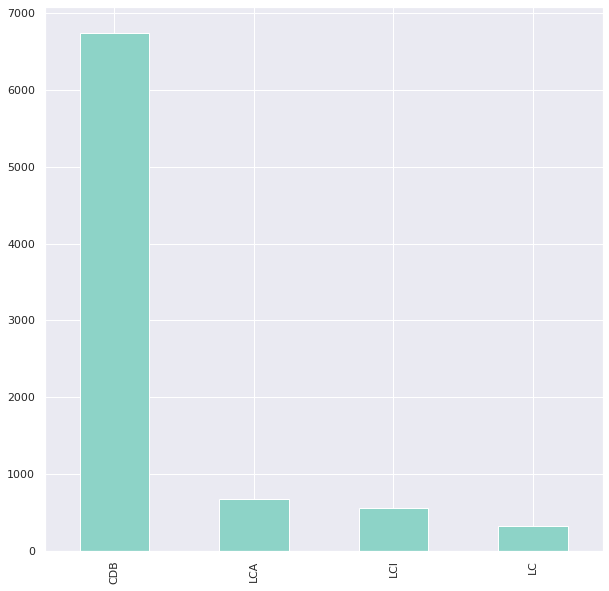

In [66]:
plt.figure(figsize=(10,10))
df_fixa['NomeInvestimento__c'].value_counts().plot(kind='bar')

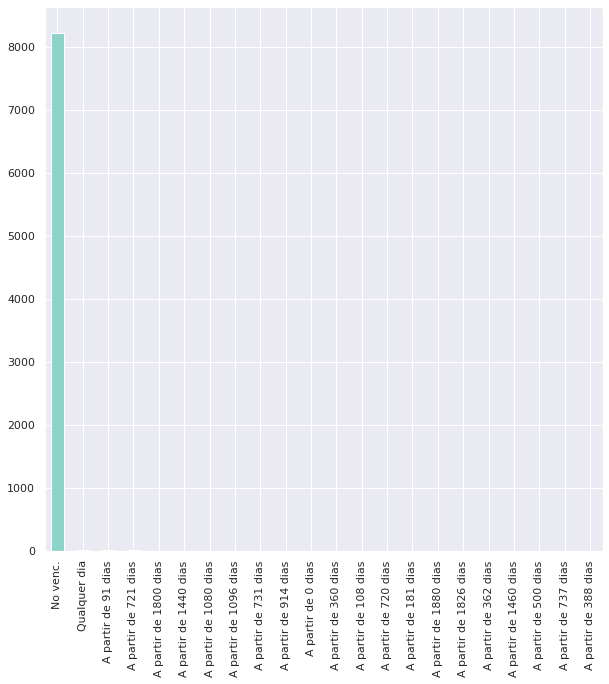

In [67]:
plt.figure(figsize=(10,10))
df_fixa['DescricaoCarencia__c'].value_counts().plot(kind='bar')

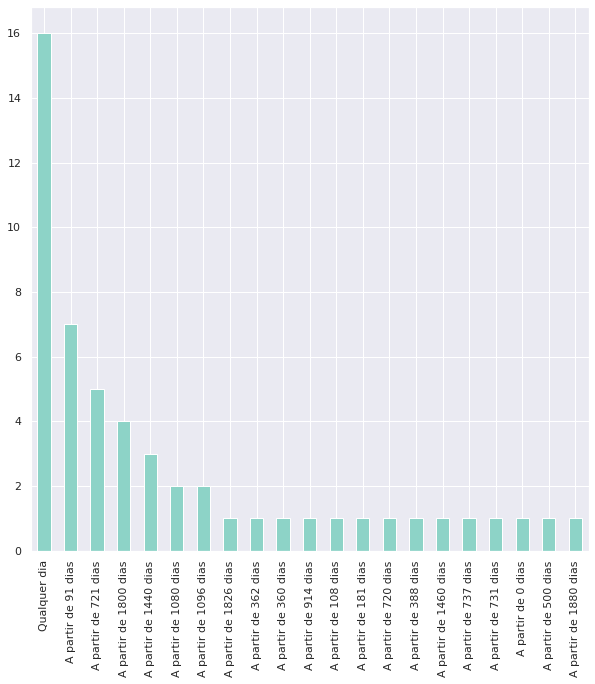

In [68]:
plt.figure(figsize=(10,10))
df_fixa[df_fixa['DescricaoCarencia__c'] != 'No venc.']['DescricaoCarencia__c'].value_counts().plot(kind='bar')

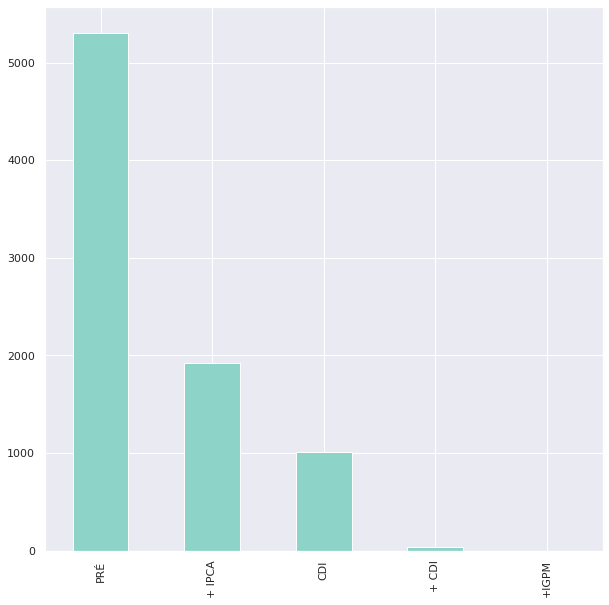

In [69]:
plt.figure(figsize=(10,10))
df_fixa['NomeIndexador__c'].value_counts().plot(kind='bar')

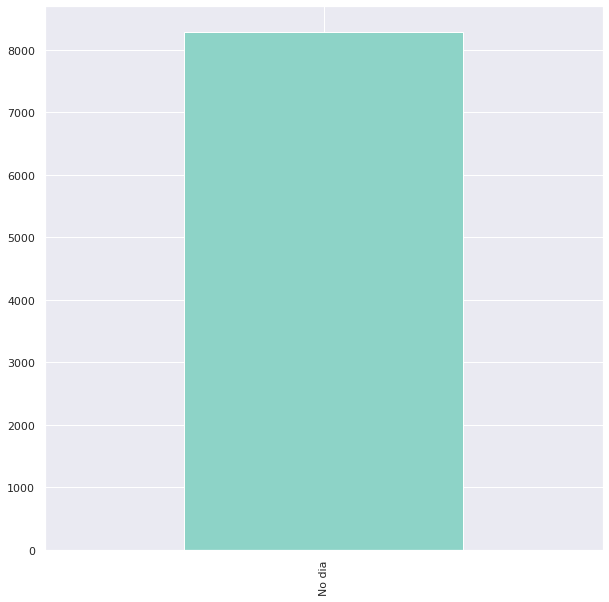

In [70]:
plt.figure(figsize=(10,10))
df_fixa['DescricaoLiquidacaoResgate__c'].value_counts().plot(kind='bar')

In [71]:
df_fixa[df_fixa['DiasVencimento__c'] < 17500]['DiasVencimento__c'].describe()

count    8278.000000
mean      856.404083
std       539.254568
min        -1.000000
25%       361.000000
50%       719.000000
75%      1249.000000
max      2520.000000
Name: DiasVencimento__c, dtype: float64

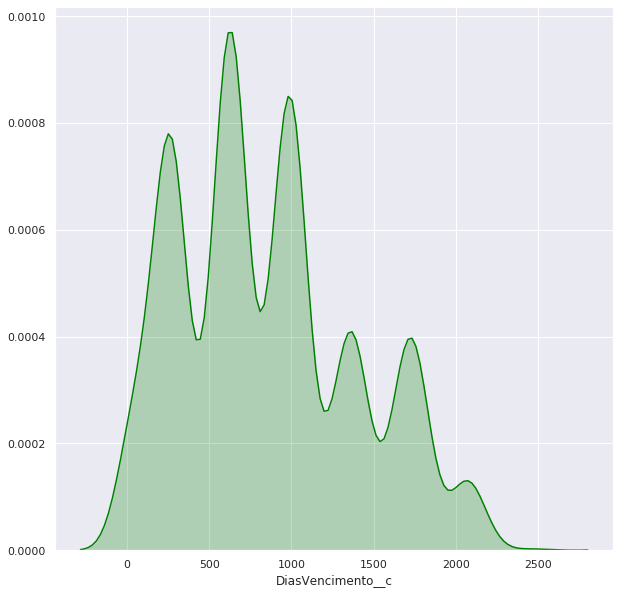

In [72]:
plt.figure(figsize=(10,10))
sns.distplot(df_fixa[df_fixa['DiasVencimento__c'] < 17500]['DiasVencimento__c'], hist=False, color="g", kde_kws={"shade": True})

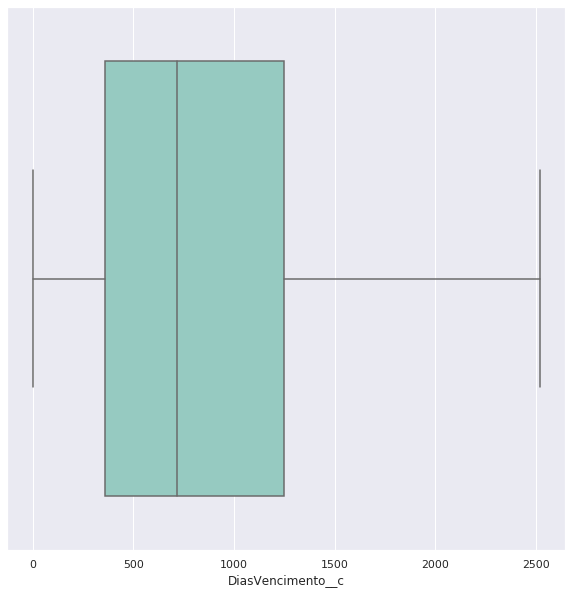

In [73]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df_fixa[df_fixa['DiasVencimento__c'] < 17500]['DiasVencimento__c'])

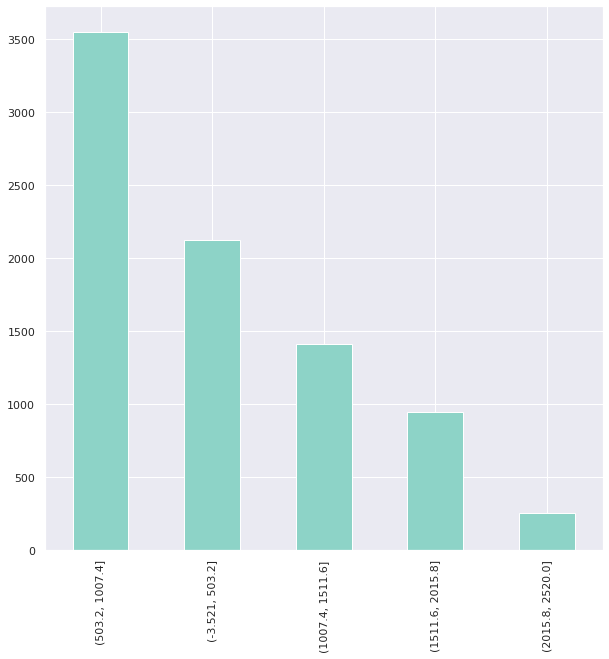

In [142]:
plt.figure(figsize=(10,10))
df_fixa['b_dias_vencimento'].value_counts().plot(kind='bar')

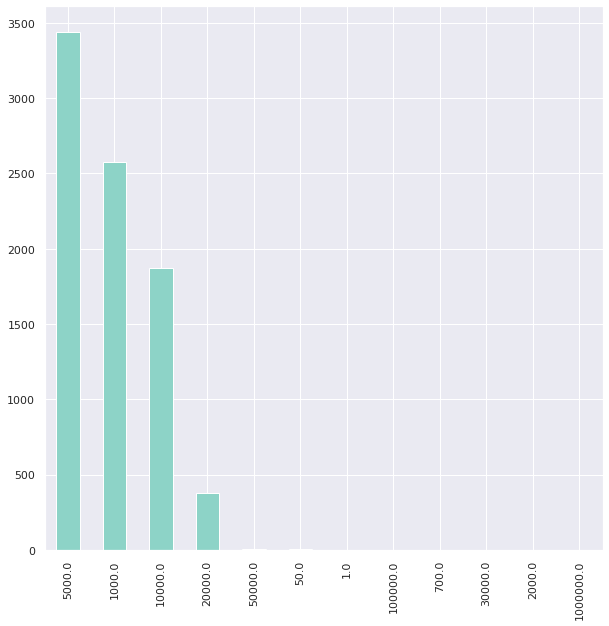

In [74]:
plt.figure(figsize=(10,10))
df_fixa['FiltroValorMinimo__c'].value_counts().plot(kind='bar')

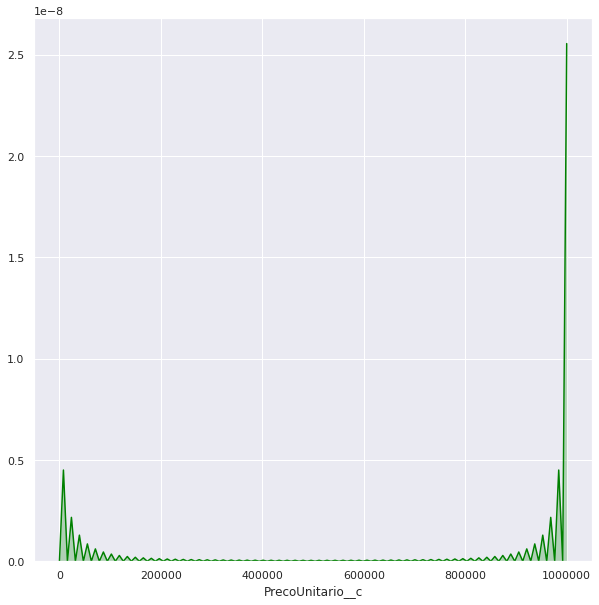

In [75]:
plt.figure(figsize=(10,10))
sns.distplot(df_fixa['PrecoUnitario__c'], hist=False, color="g", kde_kws={"shade": True})

## Exploração Bivariada

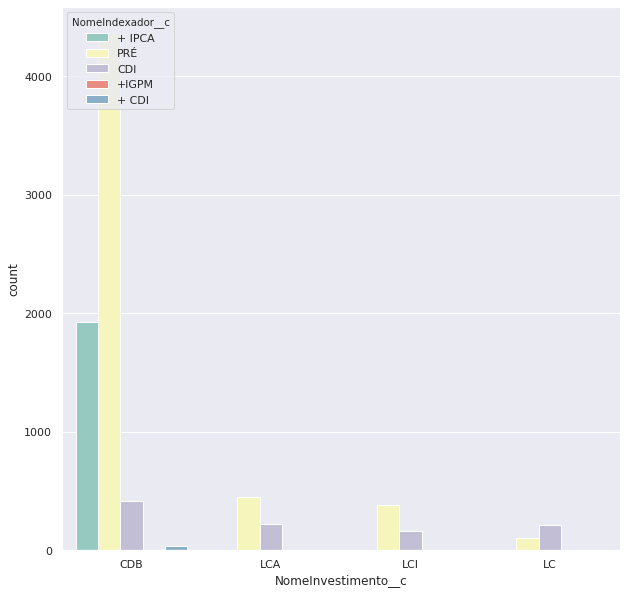

In [76]:
plt.figure(figsize=(10,10))
sns.countplot(x='NomeInvestimento__c', hue="NomeIndexador__c", data=df_fixa)

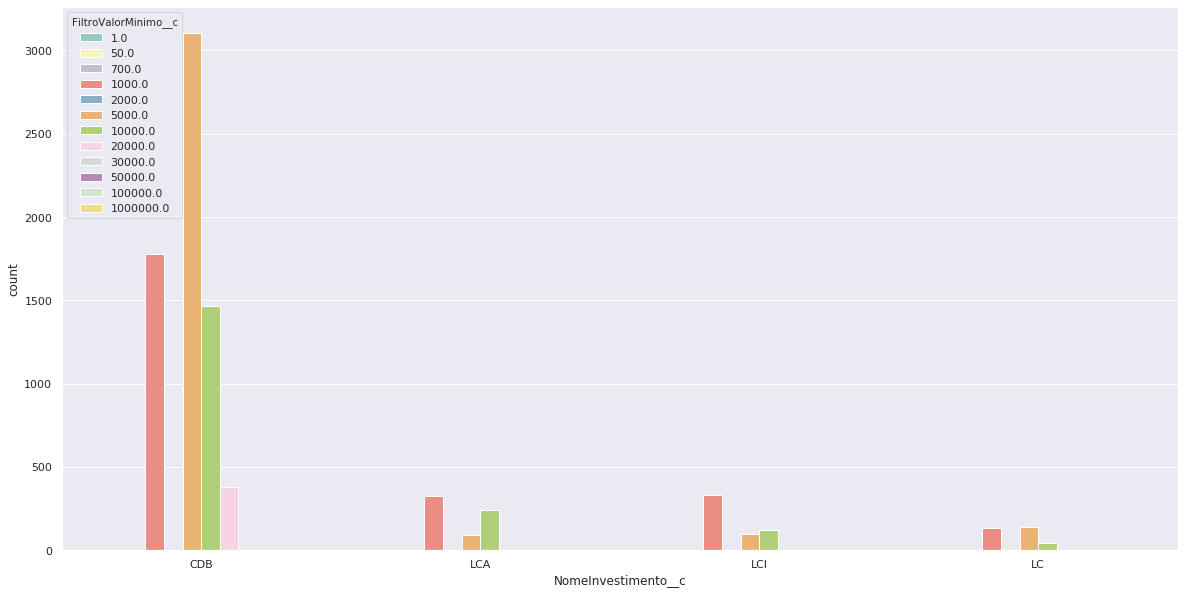

In [77]:
plt.figure(figsize=(20,10))
sns.countplot(x='NomeInvestimento__c', hue="FiltroValorMinimo__c", data=df_fixa)

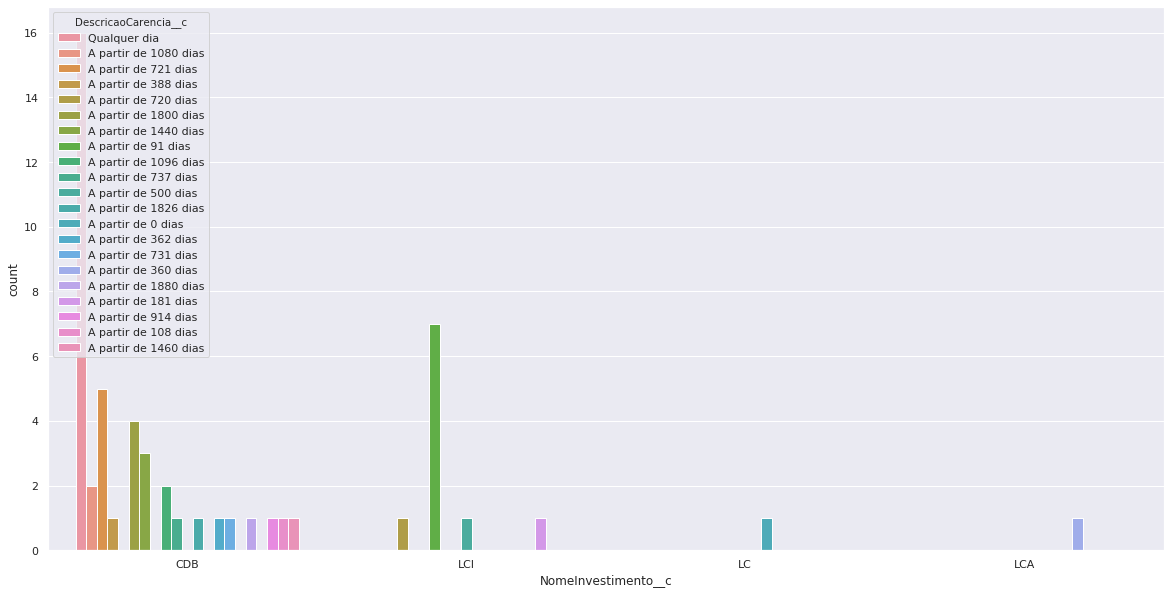

In [79]:
plt.figure(figsize=(20,10))
data = df_fixa[df_fixa['DescricaoCarencia__c'] != 'No venc.']
sns.countplot(x='NomeInvestimento__c', hue="DescricaoCarencia__c", data=data)

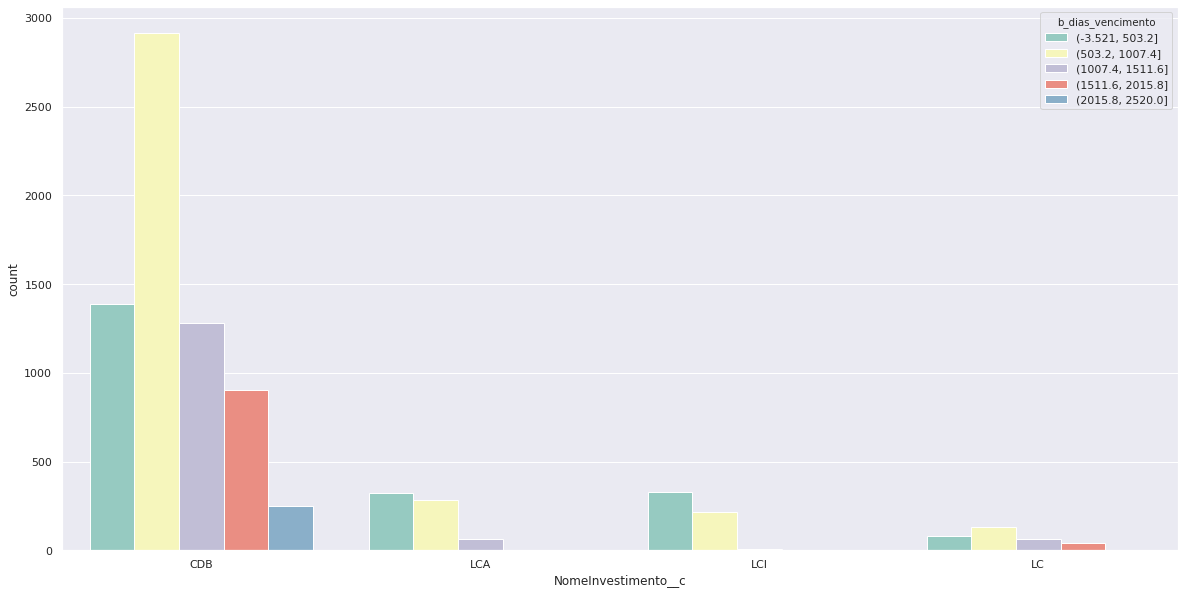

In [143]:
plt.figure(figsize=(20,10))
sns.countplot(x='NomeInvestimento__c', hue="b_dias_vencimento", data=df_fixa)

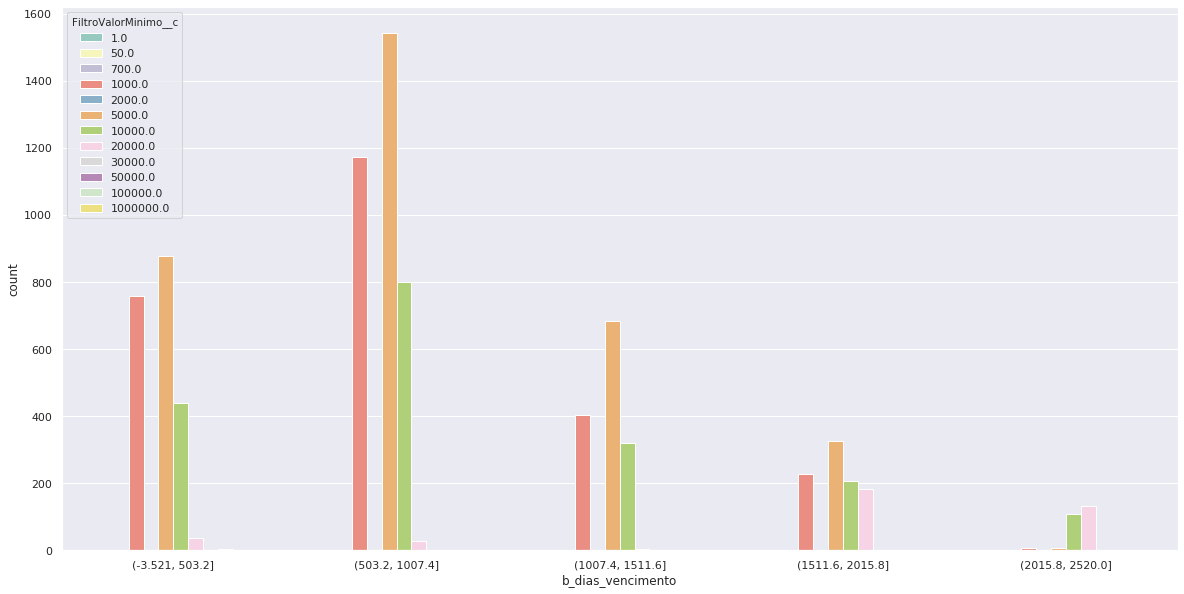

In [144]:
plt.figure(figsize=(20,10))
sns.countplot(x='b_dias_vencimento', hue="FiltroValorMinimo__c", data=df_fixa)

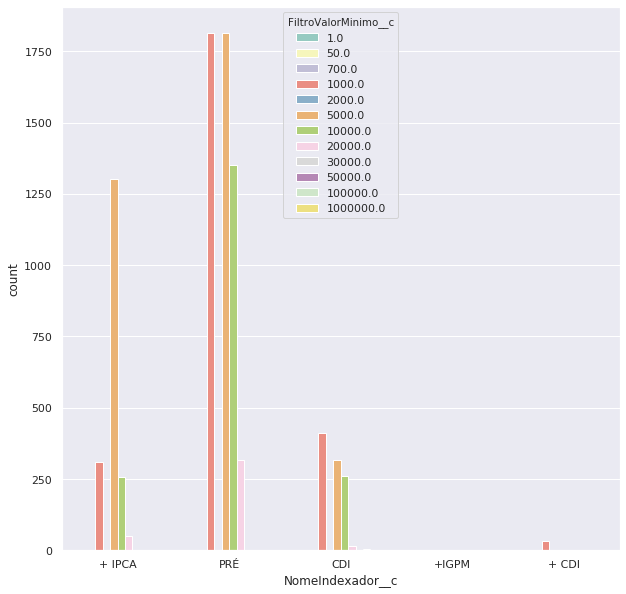

In [145]:
plt.figure(figsize=(10,10))
sns.countplot(x='NomeIndexador__c', hue="FiltroValorMinimo__c", data=df_fixa)

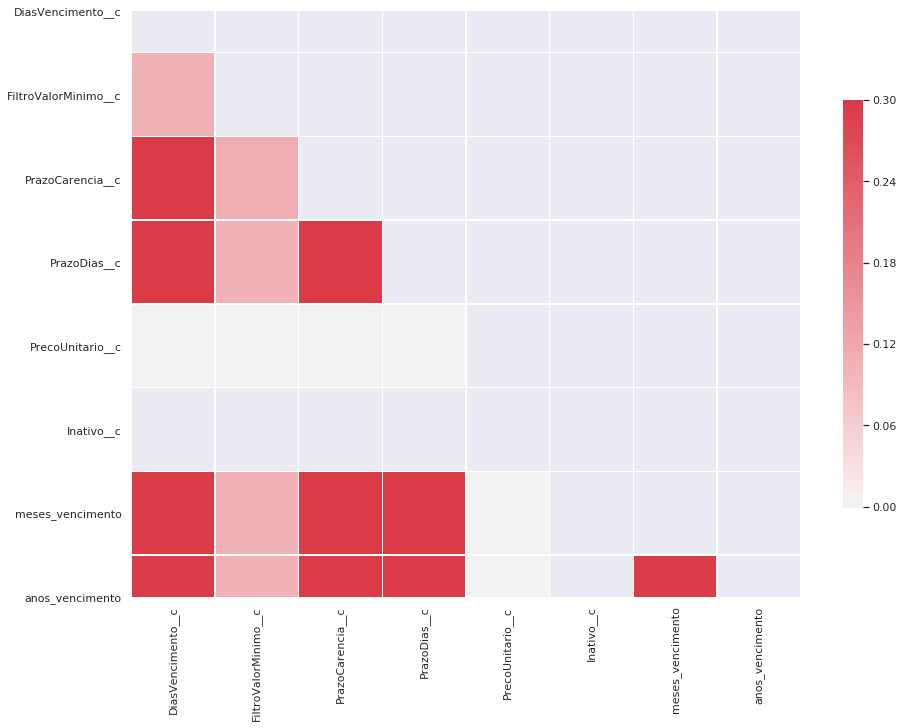

In [146]:
plt.figure(figsize=(15,15))
corr = df_fixa.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [147]:
df_fixa.to_csv('./data/processados/produtos_fixa.csv', index= False)